# GP: Visualizing Earnings Based on College Majors

**by Fernando Romero**

Hi!

The purpose of this project is to apply a variety of visualization tools in pandas and matplotlib. The dataset we'll analyze contains information about job outcomes of students who graduated from college between 2010 and 2012. The data was generated by American Community Survey and FiveThirthyEight cleaned it and uploaded it to their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row represents a different major in college. Here's a preview of the columns:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Some of the questions we'll be trying to answer through visualizations:

- Do students in more popular majors make more money?
  - Using scatter plots
- How many majors are predominantly male? Predominantly female?
  - Using histograms
- Which category of majors have the most students?
  - Using bar plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

#initial data exploration
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

### Missing values

Matplotlib expects matching lengths and no missing values. As we'll soon see, only one row contains missing values. We can confidently eliminate it without any real difference.

In [3]:
print('before:', recent_grads.shape[0], recent_grads.isnull().sum().sum())
recent_grads = recent_grads.dropna()
print('after:', recent_grads.shape[0], recent_grads.isnull().sum().sum())

before: 173 4
after: 172 0


### Initial plots: pandas and scatter plots

We'll start generating plots for data analysis.

It's always important to remember *why* we are doing the analysis. What are we trying to find out? These are the guiding questions:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

Let's try to answer them.

-0.1067376702051372


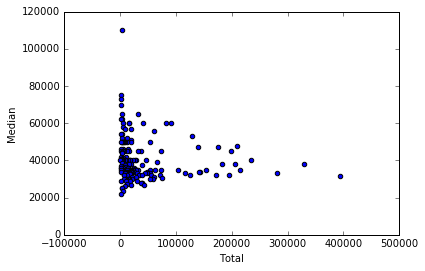

In [4]:
print(recent_grads['Total'].corr(recent_grads['Median']))
(recent_grads.plot(
    x = 'Total',
    y = 'Median',
    kind = 'scatter'))

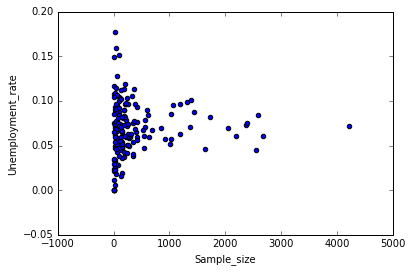

In [5]:
(recent_grads.plot(
    x = 'Sample_size',
    y = 'Unemployment_rate',
    kind = 'scatter'))

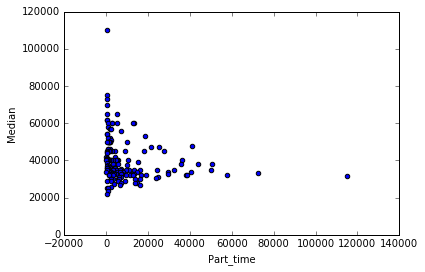

In [6]:
(recent_grads.plot(
    x = 'Part_time',
    y = 'Median',
    kind = 'scatter'))

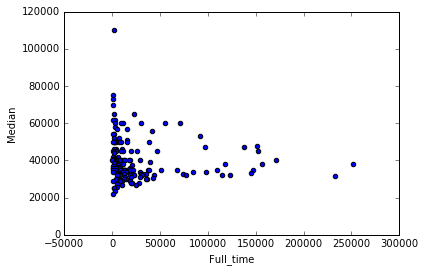

In [7]:
(recent_grads.plot(
    x = 'Full_time',
    y = 'Median',
    kind = 'scatter'))

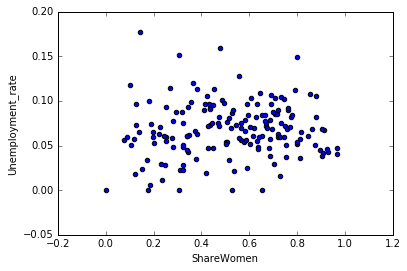

In [8]:
(recent_grads.plot(
    x = 'ShareWomen',
    y = 'Unemployment_rate',
    kind = 'scatter'))

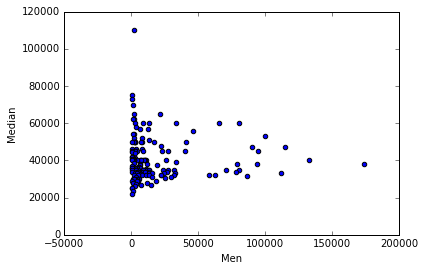

In [9]:
(recent_grads.plot(
    x = 'Men',
    y = 'Median',
    kind = 'scatter'))

-0.6186897512131612


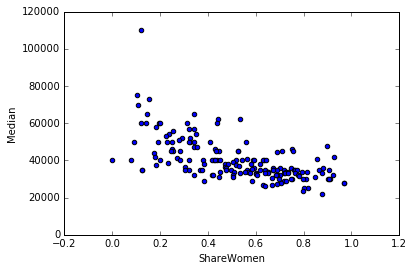

In [10]:
print(recent_grads['ShareWomen'].corr(recent_grads['Median']))
(recent_grads.plot(
    x = 'ShareWomen',
    y = 'Median',
    kind = 'scatter'))

Let's try generating histograms to analyze the frequency distributions in each column:

In [11]:
cols = [
    'Sample_size',
    'Median',
    'Employed',
    'Full_time',
    'ShareWomen',
    'Unemployment_rate',
    'Men',
    'Women']

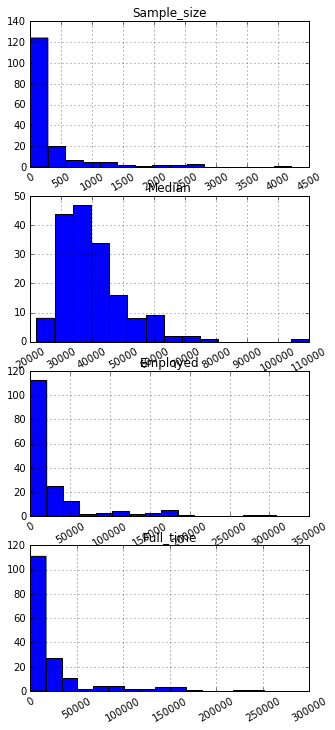

In [12]:
#from 0 to 4 in cols

#initialize a plt figure:
fig = plt.figure(figsize=(5,12))

#iterate from 0 to 3; we'll use 'i' to:
#1. access the location and name in the cols list
#2. specify the location in the plt figure
for i in range(0,4):
    ax = fig.add_subplot(4,1,i+1)
    ax = recent_grads[cols[i]].hist(bins=15,xrot=30)
    ax = ax.set_title(cols[i])

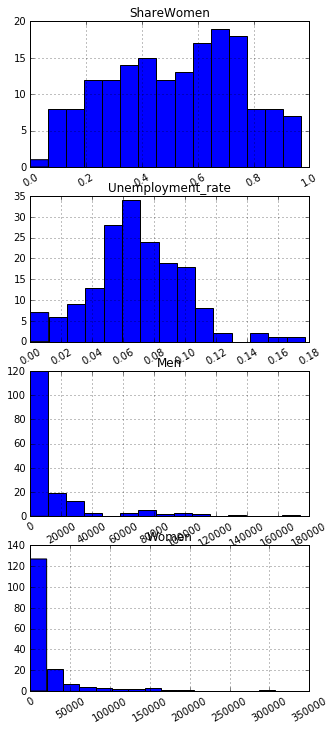

In [13]:
#from 4 to 8 in cols

fig = plt.figure(figsize=(5,12))

for i in range(4,8):
    ax = fig.add_subplot(4,1,i-3)
    ax = recent_grads[cols[i]].hist(bins=15,xrot=30)
    ax = ax.set_title(cols[i])

### pandas and Scatter Matrix

We'll generate a matrix of 2x2 to observe the interactions between the `sample_size` and the `Median` columns.

Then, we'll continue with more visualizations.

In [14]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5402cf54a8>,
      dtype=object)

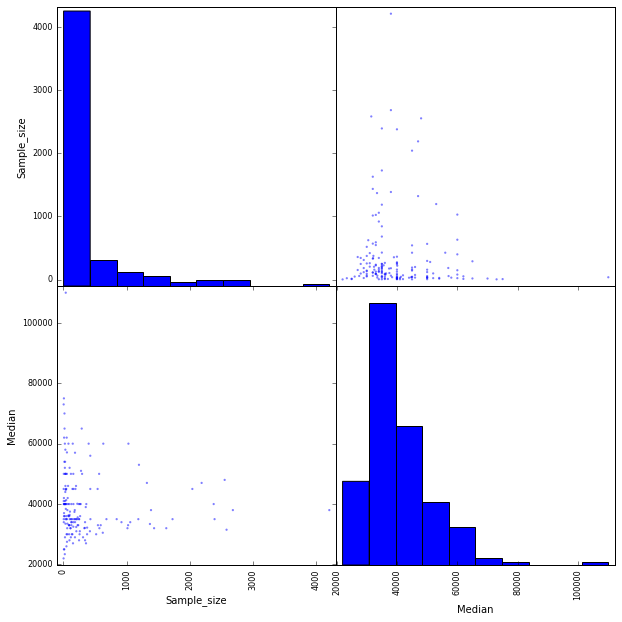

In [15]:
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5402b5e9b0>,
      dtype=object)

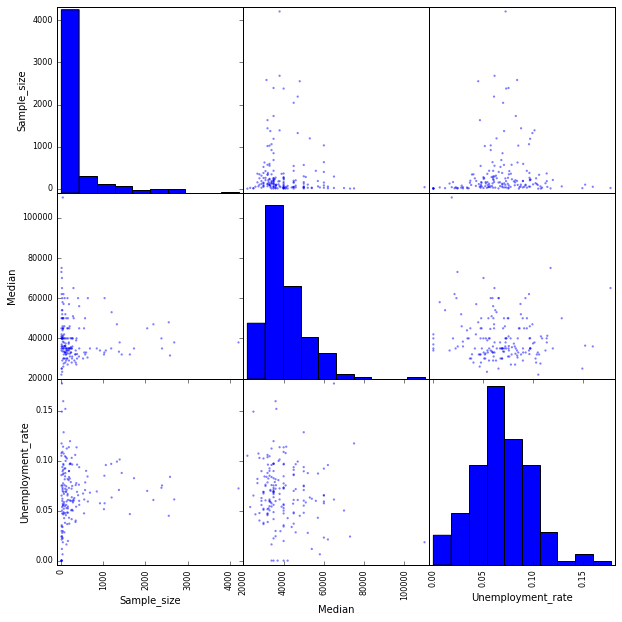

In [16]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f540281f048>,
      dtype=object)

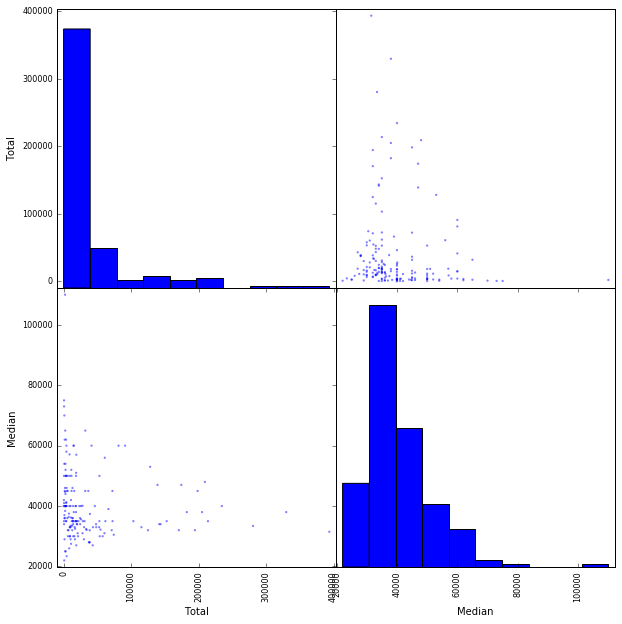

In [17]:
scatter_matrix(recent_grads[['Total','Median']], figsize=(10,10))

-0.07903093567520722


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54026bf908>,
      dtype=object)

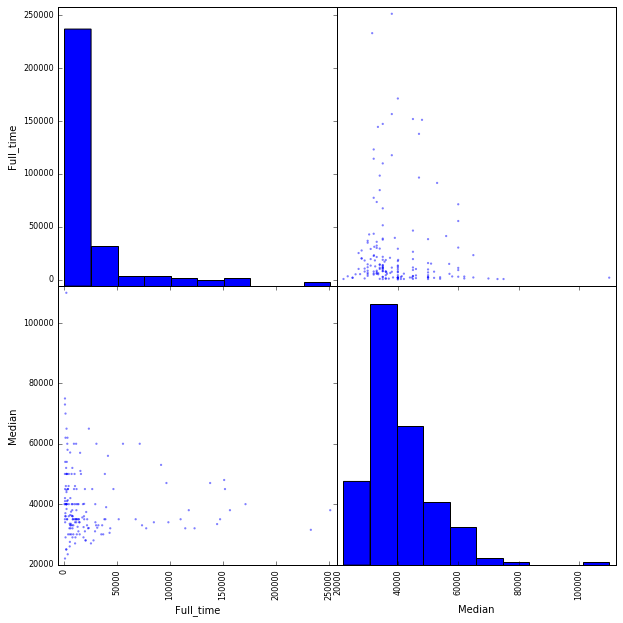

In [18]:
print(recent_grads['Full_time'].corr(recent_grads['Median']))
scatter_matrix(recent_grads[['Full_time','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54024fdc18>,
      dtype=object)

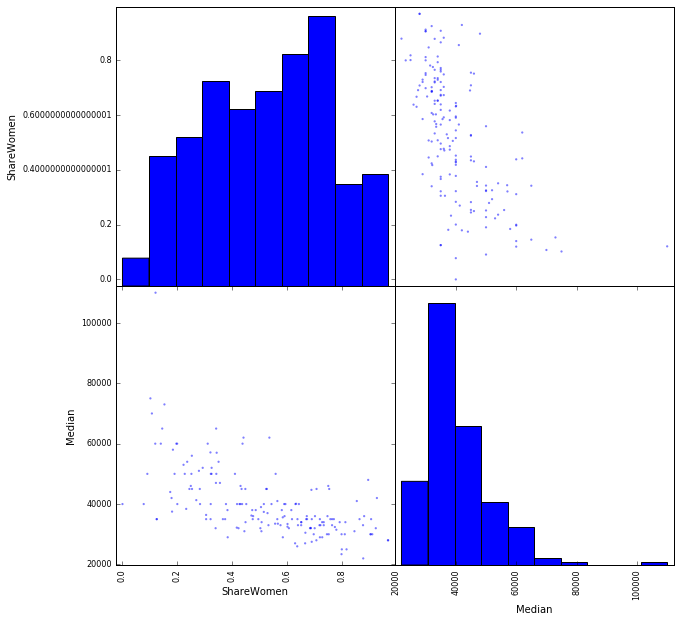

In [19]:
scatter_matrix(recent_grads[['ShareWomen','Median']], figsize=(10,10))

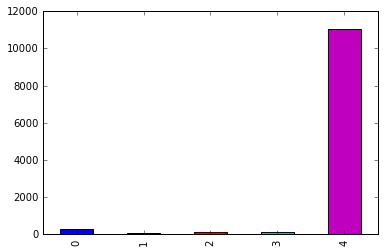

In [20]:
recent_grads[:5]['Women'].plot(kind='bar')

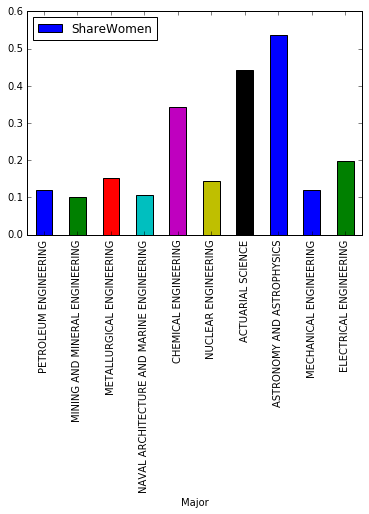

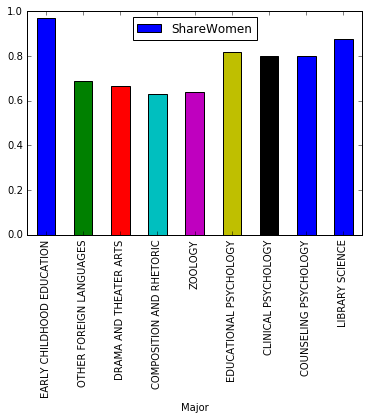

In [21]:
recent_grads[:10].plot(x='Major', y='ShareWomen', kind='bar')
recent_grads[163:].plot(x='Major', y='ShareWomen', kind='bar')

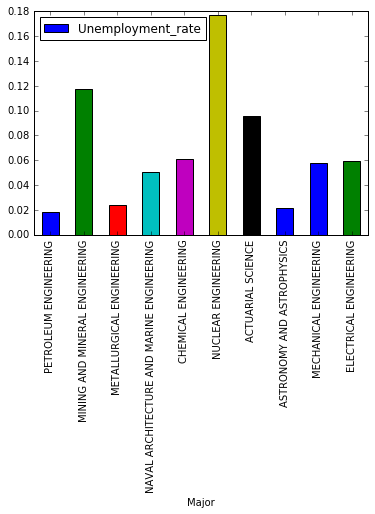

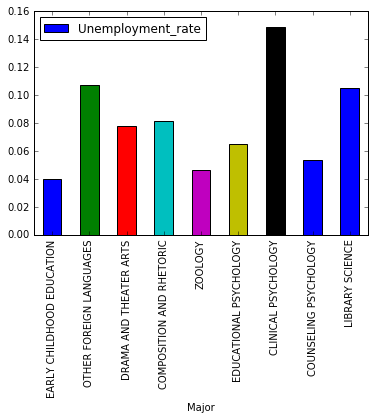

In [22]:
recent_grads[:10].plot(x='Major', y='Unemployment_rate', kind='bar')
recent_grads[163:].plot(x='Major', y='Unemployment_rate', kind='bar')

As a final analysis, we'll aggregate data to plot the amount of women and men in each category.

We'll use fot loops to create dictionaries and then plot them. I know, I know: you could just a group or pivot_table method, but that will come later.

In [23]:
major_categories = recent_grads['Major_category'].value_counts().index
major_categories

Index(['Engineering', 'Education', 'Humanities & Liberal Arts',
       'Biology & Life Science', 'Business', 'Health',
       'Computers & Mathematics', 'Physical Sciences',
       'Psychology & Social Work', 'Social Science',
       'Agriculture & Natural Resources', 'Arts',
       'Industrial Arts & Consumer Services', 'Law & Public Policy',
       'Communications & Journalism', 'Interdisciplinary'],
      dtype='object')

In [24]:
men_dict = {}
women_dict = {}

for m in major_categories:
    temp_df = recent_grads[recent_grads['Major_category'] == m][['Men','Women']]
    men_sum = temp_df['Men'].sum()
    women_sum = temp_df['Women'].sum()
    men_dict[m] = men_sum
    women_dict[m] = women_sum

In [25]:
men_dict

{'Agriculture & Natural Resources': 40357.0,
 'Arts': 134390.0,
 'Biology & Life Science': 184919.0,
 'Business': 667852.0,
 'Communications & Journalism': 131921.0,
 'Computers & Mathematics': 208725.0,
 'Education': 103526.0,
 'Engineering': 408307.0,
 'Health': 75517.0,
 'Humanities & Liberal Arts': 272846.0,
 'Industrial Arts & Consumer Services': 103781.0,
 'Interdisciplinary': 2817.0,
 'Law & Public Policy': 91129.0,
 'Physical Sciences': 95390.0,
 'Psychology & Social Work': 98115.0,
 'Social Science': 256834.0}

In [26]:
women_dict

{'Agriculture & Natural Resources': 35263.0,
 'Arts': 222740.0,
 'Biology & Life Science': 268943.0,
 'Business': 634524.0,
 'Communications & Journalism': 260680.0,
 'Computers & Mathematics': 90283.0,
 'Education': 455603.0,
 'Engineering': 129276.0,
 'Health': 387713.0,
 'Humanities & Liberal Arts': 440622.0,
 'Industrial Arts & Consumer Services': 126011.0,
 'Interdisciplinary': 9479.0,
 'Law & Public Policy': 87978.0,
 'Physical Sciences': 90089.0,
 'Psychology & Social Work': 382892.0,
 'Social Science': 273132.0}

In [27]:
#transform dictionaries into pandas series
men_total = pd.Series(men_dict)
women_total = pd.Series(women_dict)

In [28]:
men_total

Agriculture & Natural Resources         40357.0
Arts                                   134390.0
Biology & Life Science                 184919.0
Business                               667852.0
Communications & Journalism            131921.0
Computers & Mathematics                208725.0
Education                              103526.0
Engineering                            408307.0
Health                                  75517.0
Humanities & Liberal Arts              272846.0
Industrial Arts & Consumer Services    103781.0
Interdisciplinary                        2817.0
Law & Public Policy                     91129.0
Physical Sciences                       95390.0
Psychology & Social Work                98115.0
Social Science                         256834.0
dtype: float64

In [29]:
women_total

Agriculture & Natural Resources         35263.0
Arts                                   222740.0
Biology & Life Science                 268943.0
Business                               634524.0
Communications & Journalism            260680.0
Computers & Mathematics                 90283.0
Education                              455603.0
Engineering                            129276.0
Health                                 387713.0
Humanities & Liberal Arts              440622.0
Industrial Arts & Consumer Services    126011.0
Interdisciplinary                        9479.0
Law & Public Policy                     87978.0
Physical Sciences                       90089.0
Psychology & Social Work               382892.0
Social Science                         273132.0
dtype: float64

In [30]:
major_category_df = pd.DataFrame(men_total, columns = ['men_total'])
major_category_df['women_total'] = women_total
major_category_df

,men_total,women_total
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0
Humanities & Liberal Arts,272846.0,440622.0


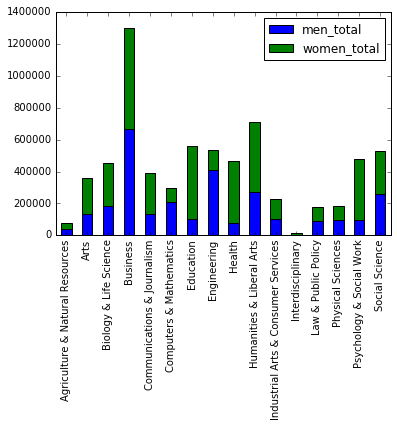

In [31]:
major_category_df.plot.bar(rot=90, stacked = True)

As an extra plot, we'll observe the distribution of the `Median` and `Unemployment_rate` columns.

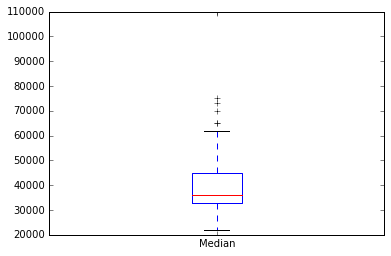

In [32]:
recent_grads['Median'].plot.box()

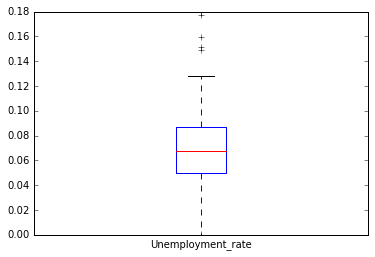

In [33]:
recent_grads['Unemployment_rate'].plot.box()

# Conclusions

- Do students in more popular majors make more money?
  - The scatter plot "Median" vs "Total" doesn't seem to suggest any strong correlation between them. Their correlation is of -0.1.

- Do students that majored in subjects that were majority female make more money?
  - It appears that there is a negative correlation between 'ShareWomen' and 'Median': in fact, it's of -0.61. If we take a look at the majors with a higher share of women, we could start to see patterns for future analysis. Of course, it should be a multivariate analysis to avoid simplistic answers.

- Is there any link between the number of full-time employees and median salary?
  - The "Full-time" vs "Median" plot doesn't suggest any real correlation. Numerically speaking, it's of just -0.07.

### Future Anaysis...

In order to predict high salary we should instead create a Linear Regression model that takes into account not only fields of study and gender, but behavioral and personality traits and other possible factors.